**SM339 &#x25aa; Applied Statistics &#x25aa; Spring 2023 &#x25aa; Uhan**

# Lesson 4. Hypothesis Testing &mdash; Part 2

## Performing a $t$-test for population mean in R

__Example 1 (from Part 1).__ 
A Keurig machine is supposed to output 6 ounces of coffee when the smallest size is selected.
For quality control, one machine is selected to be tested extensively to determine whether its average output is actually 6 ounces.
The mean output of 20 cups of coffee is 6.1 ounces, and the standard deviation is 0.3 ounces.
Use a significance level of 0.10 to test whether this machine's average output differs from 6 ounces.

In the same folder as this notebook, there is a CSV file `data/keurig.csv` that contains this data.

Let's start by reading in the data:

In [1]:
Keurig <- read.table('data/keurig.csv', header=TRUE, sep=',')

head(Keurig)

,output
,<dbl>
1,6.240
2,6.447
3,6.410
4,6.409
5,5.573
6,5.670


Before performing the $t$-test for population mean, let's check whether the data is approximately Normal by creating a normal Q-Q plot:

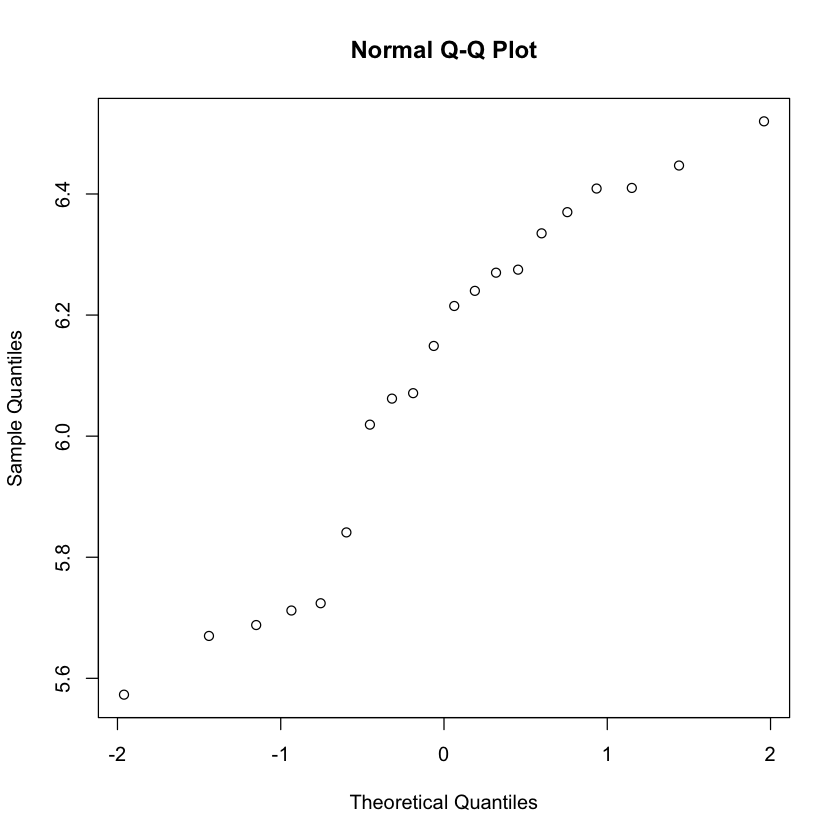

In [2]:
# Solution
qqnorm(Keurig$output)

The normal Q-Q plot looks like an approximately straight line, so we're OK. Now we can perform the $t$-test using the `t.test()` function in R:

In [3]:
# Solution
t.test(Keurig$output, alternative="two.sided", mu = 6)


	One Sample t-test

data:  Keurig$output
t = 1.4901, df = 19, p-value = 0.1526
alternative hypothesis: true mean is not equal to 6
95 percent confidence interval:
 5.959535 6.240465
sample estimates:
mean of x 
      6.1 


In the R code above, `mu = ...` specifies the null hypothesis value. Depending on our hypotheses, we specify `alternative = ...` differently:

| Hypotheses | `alternative` |
| - | - |
| $H_0$: $\mu \le 6$, $H_A$: $\mu > 6$ | `greater` |
| $H_0$: $\mu \ge 6$, $H_A$: $\mu < 6$ | `less` |
| $H_0$: $\mu = 6$, $H_A$: $\mu \ne 6$ | `two.sided` |

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## Exercises

### Problem 1

So far, we have constructed confidence intervals by hand. The R function `t.test()` will automatically calculate a CI for a mean. (You can run `?t.test` in a cell to see what else this function does.)

In the same folder as this notebook, there is a CSV file `data/heights.csv`, containing the (fictional) heights of 16 midshipmen in inches, which you used for Problem 1 in the Lesson 3 Exercises.

(a) Run the following code to compute a 90\% CI for the mean height of all midshipmen. Does it match what you got in Lesson 3?

In [4]:
Heights <- read.table('data/heights.csv', header=TRUE, sep=',')

t.test(Heights$height, conf.level=0.90)


	One Sample t-test

data:  Heights$height
t = 107.21, df = 15, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
90 percent confidence interval:
 70.38002 72.71998
sample estimates:
mean of x 
    71.55 


(b) Interpret your interval in the context of the problem.

*Write your answer here. Double-click to edit.*

*Solution.* Based on this data, we are 90% confident that the true mean height of all midshipmen is between 70.38002 and 72.71998.

(c) Would a 99% CI calculated from the same data be wider or more narrow than the interval you calculated in (a)? Briefly explain your answer.

*Write your answer here. Double-click to edit.*

*Solution.* A 99% CI ($\alpha = 0.01$) would be wider than the 90% CI ($\alpha = 0.10$), because the critical value $t_{\alpha/2}$ would be larger for a 99% CI.

### Problem 2

Suppose the average height of all college students is 70 inches. We would like to know if the average height of all midshipmen differs from the national average.

(a) Use the data in `data/Heights.csv` from Problem 1 to test at a signficance level of $\alpha = 0.05$ whether the average height of all midshipmen differs from the national average. Report your null and alternative hypotheses, the test statistics, the $p$-value, and your conclusion.

In [5]:
# Solution
t.test(Heights$height, alternative = "two.sided", mu = 70, conf.level = 0.95)


	One Sample t-test

data:  Heights$height
t = 2.3225, df = 15, p-value = 0.03468
alternative hypothesis: true mean is not equal to 70
95 percent confidence interval:
 70.12748 72.97252
sample estimates:
mean of x 
    71.55 


*Write your answer here. Double-click to edit.*

*Solution.*

* Hypotheses: $H_0$: $\mu = 70$, $H_A$: $\mu \ne 70$

* Test statistic: $2.3225$

* $p$-value: $0.0348$

* Conclusion: At the $\alpha = 0.05$ significance level, we reject the null hypothesis, because the $p$-value is less than $\alpha$. We see evidence that the true average height of all midshipmen differs from 70 inches.

(b) If you concluded that the average midshipman height is different from 70 inches when in fact it is not, which type of error did you make (Type I or Type II)? 

*Write your answer here. Double-click to edit.*

*Solution.* If we erroneously reject the null hypothesis, that is a Type I error.

### Problem 3

Suppose the average math SAT score among midshipmen 20 years ago was 500, and we want to know if there is evidence that the average score among current midshipmen is lower.

(a) In the same folder as this notebook, there is a CSV file `data/scores.csv` containing the (fictional) math SAT scores from current midshipmen, which you used in Problem 2 in the Lesson 3 Exercises. Use this data to test at a signficance level of $\alpha = 0.01$ whether the average math SAT score among current midshipmen is lower than 500. Report your null and alternative hypotheses, the test statistics, the $p$-value, and your conclusion.

In [6]:
# Solution
Scores <- read.table('data/scores.csv', header = TRUE, sep = ',')

t.test(Scores$score, alternative = "less", mu = 500, conf.level = 0.99)


	One Sample t-test

data:  Scores$score
t = 1.1422, df = 24, p-value = 0.8677
alternative hypothesis: true mean is less than 500
99 percent confidence interval:
    -Inf 547.984
sample estimates:
mean of x 
   515.08 


*Write your answer here. Double-click to edit.*

*Solution.*

* Hypotheses: $H_0$: $\mu \ge 500$, $H_A$: $\mu < 500$

* Test statistic: $1.1422$

* $p$-value: $0.8677$

* Conclusion: At the $\alpha = 0.01$ significance level, we fail to reject the null hypothesis, because the $p$-value is greater than $\alpha$. We do not see evidence that the average math SAT score among current midshipmen is less than 500.

(b) If you concluded that the current average score is not lower than 500, when in fact it is, which type of error did you make (Type I or Type II)? 

*Write your answer here. Double-click to edit.*

*Solution.* If we erroneously fail to reject the null hypothesis, that is a Type II error.